# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

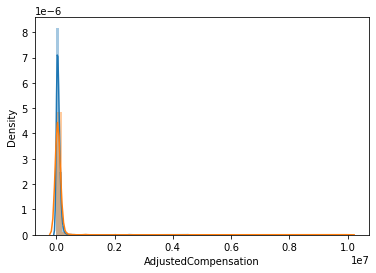

In [2]:
#Your code here
import flatiron_stats as fs
FE = 'FormalEducation'
AC = 'AdjustedCompensation'
MD = "Master's degree"
BD = "Bachelor's degree"
sub = data[(~data[FE].isnull()) & (~data[AC].isnull())]
sub1= sub[sub[FE]==MD][AC]
sub2 = sub[sub[FE]==BD][AC]

import seaborn as sns
sns.distplot(sub1)
sns.distplot(sub2)


In [3]:
fs.p_value_welch_ttest(sub1, sub2)

0.33077639451272445

In [4]:
q=np.linspace(.75, 1, num=15)
sub1_quantile = sub1.quantile(q=q)
sub2_qauntile =  sub2.quantile(q=q)

In [5]:
sub1_quantile,sub2_qauntile

(0.750000    9.200000e+04
 0.767857    9.566608e+04
 0.785714    1.000000e+05
 0.803571    1.050000e+05
 0.821429    1.100000e+05
 0.839286    1.150000e+05
 0.857143    1.200000e+05
 0.875000    1.250000e+05
 0.892857    1.315409e+05
 0.910714    1.400000e+05
 0.928571    1.500000e+05
 0.946429    1.632743e+05
 0.964286    1.848214e+05
 0.982143    2.200000e+05
 1.000000    4.498900e+06
 Name: AdjustedCompensation, dtype: float64,
 0.750000      80231.00
 0.767857      85000.00
 0.785714      90000.00
 0.803571      94543.09
 0.821429     100000.00
 0.839286     103000.00
 0.857143     110000.00
 0.875000     115000.00
 0.892857     120000.00
 0.910714     127342.40
 0.928571     139039.74
 0.946429     150000.00
 0.964286     182500.00
 0.982143     200577.50
 1.000000    9999999.00
 Name: AdjustedCompensation, dtype: float64)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [6]:
#2 Categories therefore we do t tests.

In [7]:

subset = data[(~data[FE].isnull()) & (~data[AC].isnull())]
subset1 = subset[subset[FE]=="Doctoral degree"][AC]
subset2 = subset[subset[FE]=="Bachelor's degree"][AC]

In [8]:
#Checking for difference in t value when there are outliers and where there are no outliers

In [9]:
fs.p_value_welch_ttest(subset1, subset2)

0.15682381994720251

In [10]:
outlier_limit = 2000000
subset_no_outlier1 = subset[(subset[FE]=="Doctoral degree") & (subset[AC]<=outlier_limit)][AC]
subset_no_outlier2 = subset[(subset[FE]=="Bachelor's degree") & (subset[AC]<=outlier_limit)][AC]

In [11]:
fs.p_value_welch_ttest(subset_no_outlier1,subset_no_outlier2 )

0.0

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [12]:
#Your code here
from statsmodels.formula.api import ols
import statsmodels.api as sm
formula = 'FE~C(AC)'
#fitting a model
linear_model = ols(formula, data).fit()



PatsyError: Number of rows mismatch between data argument and FE (26394 versus 1)
    FE~C(AC)
    ^^

In [ ]:
#Anova table
anova_table = sm.stats.anova_linear_model(linear_model, typ=2)

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!